Be prepared to demonstrate live.  Also, be prepared to answer these question for other players and teams.
1. Find the following statistics for two players, Patrick Kane and Alexander Ovechkin for the 2016-2017 season:
    1. How many shift per game did they take?
    2. What was the average time per shift?
    3. How many shot attempts did they have per game?
    4. How many goals did they score per game?
2. Visualize the following for two players, Patrick Kane and Alexander Ovechkin for the 2016-2017 season:
    1. Plot on an x/y coordinate system all of their shot attempts for the season.
    2. Plot on an x/y coordinate system all of their hits for the season.
3. Find the following statistics for the team, the Washington Capitals for the 2017-2018 season:
    1. What was their Power Play Percentage, computed as 100% (Power Play Attempts / Power Play Goals)?
    2. Compute the average per game of the following metric (takeaways - giveaways)
4. Visualize the following for the team, the Washington Capitals for the 2017-2018 season:
    1. Plot on an x/y coordinate system all of their shot attempts for the season.
    2. Plot on an x/y coordinate system all of their hits for the season.

In [1]:
import os
import pandas as pd
import calendar
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import hist
import glob
import datetime
import urllib.request
import sys
from sys import exit

In [2]:
path = os.getcwd() # getting the path of current working directory to create the folder structure
teamInfoFile = os.path.join(path + '\\gameData\\team_info.csv') # getting the path of the csv files to be read
playerInfoFile = os.path.join(path + '\\gameData\\player_info.csv') # getting the path of the csv files to be read
gameShiftsFile = os.path.join(path + '\\gameData\\game_shifts.csv') # getting the path of the csv files to be read
gameFile = os.path.join(path + '\\gameData\\game.csv') # getting the path of the csv files to be read
gameGoalieFile = os.path.join(path + '\\gameData\\game_goalie_stats.csv') # getting the path of the csv files to be read
gameTeamsFile = os.path.join(path + '\\gameData\\game_teams_stats.csv') # getting the path of the csv files to be read
gameSkaterFile = os.path.join(path + '\\gameData\\game_skater_stats.csv') # getting the path of the csv files to be read

In [3]:
# reading the data from csv and selecting columns needed
teamInfo = pd.DataFrame.from_csv(teamInfoFile, encoding = "ISO-8859-1").reset_index()
playerInfo = pd.DataFrame.from_csv(playerInfoFile, encoding = "ISO-8859-1").reset_index()
gameShifts = pd.DataFrame.from_csv(gameShiftsFile, encoding = "ISO-8859-1").reset_index()
game = pd.DataFrame.from_csv(gameFile, encoding = "ISO-8859-1").reset_index()
gameGoalieStats = pd.DataFrame.from_csv(gameGoalieFile, encoding = "ISO-8859-1").reset_index()
gameTeamsStats = pd.DataFrame.from_csv(gameTeamsFile, encoding = "ISO-8859-1").reset_index()
gameSkaterStats = pd.DataFrame.from_csv(gameSkaterFile, encoding = "ISO-8859-1").reset_index()
teamInfoData = pd.DataFrame(teamInfo)
playerInfoData = pd.DataFrame(playerInfo)
gameShiftsData = pd.DataFrame(gameShifts)
gameData = pd.DataFrame(game)
gameGoalieStatsData = pd.DataFrame(gameGoalieStats)
gameTeamsStatsData = pd.DataFrame(gameTeamsStats)
gameSkaterStatsData = pd.DataFrame(gameSkaterStats)

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  app.launch_new_instance()
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: from_csv

In [4]:
def gettingThePlayerID():
    # input paramaters
    playerFirstName = input("Please enter the list of players First Name separted by comma: ")
    playerFirstName = playerFirstName.replace(" ","")
    playerFirstName = playerFirstName.split(",")
    playerLastName = input("Please enter the list of players Last Name separted by comma: ")
    playerLastName = playerLastName.replace(" ","")
    playerLastName = playerLastName.split(",")
    
    #playerInfoData['firstName'].isin(playerFirstName) and playerInfoData['lastName'].isin(playerLastName)
    if(any(e in playerFirstName for e in playerInfoData['firstName']) and any(e in playerLastName for e in playerInfoData['lastName'])):
        playersFiltered = playerInfoData.loc[playerInfoData['firstName'].isin(playerFirstName) & playerInfoData['lastName'].isin(playerLastName)]
        playerIDs = playersFiltered.player_id
        playingSeason = input("Please enter the list of season for the players separted by comma: ")
        playingSeason = playingSeason.replace(" ","")
        playingSeason = playingSeason.split(",")
        playersSeasonList = []
        for i in playingSeason:
            playersSeasonList.append(int(i))
        if(len(playersSeasonList)>0):
            gameIdsForSeason = pd.DataFrame(gameData.loc[gameData['season'].isin(playersSeasonList)],columns=['game_id'])
            gameIds = gameIdsForSeason.game_id
            return [playerIDs.values.tolist(), gameIds.values.tolist()]
        
        else:
            print("Please enter the valid season")
            sys.exit("Exiting the Program , Please restart the program and enter a vaild Input")
        
    else:
        print("Please enter the valid First Name and Last Name")
        
        sys.exit("Exiting the Program , Please restart the program and enter a vaild Input")
    

In [5]:
def shiftsAnalysis(playerAndGames):
    shiftsOfPlayers = gameShiftsData.loc[gameShiftsData['game_id'].isin(playerAndGames[1]) & gameShiftsData['player_id'].isin(playerAndGames[0])]
    shiftsOfPlayers['shift_difference'] = shiftsOfPlayers.shift_end-shiftsOfPlayers.shift_start
    playersTotalShiftsPerGame = pd.DataFrame({'Total_Shifts' : shiftsOfPlayers.groupby( ['player_id','game_id'] ).size()}).reset_index()
    averageShiftSeconds = pd.DataFrame(shiftsOfPlayers.groupby(['player_id','game_id'])['shift_difference'].mean().round().astype(int)).reset_index().rename(columns={'shift_difference': 'AverageShiftSeconds'})
    playersTotalShiftsPerGame['Average_Shift_Seconds']= averageShiftSeconds['AverageShiftSeconds']  
    return playersTotalShiftsPerGame

In [6]:
def shotsGoalsHitsPerPlayerPerGame(playerAndGames):
    goalsShotsPlayersForSeason = gameSkaterStatsData.loc[gameSkaterStatsData['game_id'].isin(playerAndGames[1]) & gameSkaterStatsData['player_id'].isin(playerAndGames[0])]
    goalsShotsBothPlayers = pd.DataFrame(goalsShotsPlayersForSeason, columns= ['player_id', 'game_id','goals', 'shots', 'hits'])
    return goalsShotsBothPlayers

In [7]:
def gettingTeamDetails():
    
    teamShortName = input("Please enter the list of teams Short Name separted by comma: ")
    teamShortName = teamShortName.replace(" ","")
    teamShortName = teamShortName.split(",")
    teamTeamName = input("Please enter the list of teams Team Name separted by comma: ")
    teamTeamName = teamTeamName.replace(" ","")
    teamTeamName = teamTeamName.split(",")
    
    if(any(e in teamShortName for e in teamInfoData['shortName']) and any(e in teamTeamName for e in teamInfoData['teamName'])):
   

        teamsFiltered = teamInfoData.loc[teamInfoData['shortName'].isin(teamShortName) & teamInfoData['teamName'].isin(teamTeamName)]

        teamSeason = input("Please enter the list of season for the teams separted by comma: ")
        teamSeason = teamSeason.replace(" ","")
        teamSeason = teamSeason.split(",")
        teamSeasonList = []
        for i in teamSeason:
            teamSeasonList.append(int(i))
        
        if(len(teamSeasonList)>0):
            gameIdsForSeason = pd.DataFrame(gameData.loc[gameData['season'].isin(teamSeasonList)],columns=['game_id'])
            gameIds = gameIdsForSeason.game_id
            teamIDs = teamsFiltered.team_id
            return [teamIDs.values.tolist(), gameIds.values.tolist()]
        else:
            print("Please enter the valid season")
        
            sys.exit("Exiting the Program , Please restart the program and enter a vaild Input")
                
    else:
        print("Please enter the valid Team Name and Short Name")
        
        sys.exit("Exiting the Program , Please restart the program and enter a vaild Input")
    

In [8]:
def teamStatistics(teamDetails):
    gamesTeams = pd.DataFrame(gameTeamsStatsData.loc[gameTeamsStatsData['game_id'].isin(teamDetails[1]) & gameTeamsStatsData['team_id'].isin(teamDetails[0])], columns= ['game_id', 'team_id', 'shots', 'hits', 'powerPlayOpportunities', 'powerPlayGoals', 'giveaways', 'takeaways'])
    gamesTeams['powerPlayPercentage'] = round((gamesTeams.powerPlayGoals/gamesTeams.powerPlayOpportunities)*100, 2)
    gamesTeams = gamesTeams.fillna(0.00)
    gamesTeams['powerPlayPercentage']= gamesTeams['powerPlayPercentage'].astype(str)+'%'
    gamesTeams['turnOverDifferential'] = gamesTeams.takeaways - gamesTeams.giveaways
    gamesTeams = pd.DataFrame(gamesTeams, columns = ['game_id', 'team_id', 'shots', 'hits', 'powerPlayPercentage', 'turnOverDifferential'])
    return gamesTeams

Please enter the list of players First Name separted by comma: Patrick, Alex
Please enter the list of players Last Name separted by comma: Kane, Ovechkin
Please enter the list of season for the players separted by comma: 20162017
A.How many shift per game did they take?
B.What was the average time per shift?


C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


     player_id     game_id  Total_Shifts  Average_Shift_Seconds
0      8471214  2016020007            26                     52
1      8471214  2016020022            18                     64
2      8471214  2016020039            20                     55
3      8471214  2016020056            22                     46
4      8471214  2016020071            23                     51
5      8471214  2016020096            20                     56
6      8471214  2016020121            21                     46
7      8471214  2016020130            20                     45
8      8471214  2016020138            24                     46
9      8471214  2016020149            22                     54
10     8471214  2016020168            20                     58
11     8471214  2016020187            19                     67
12     8471214  2016020209            21                     50
13     8471214  2016020218            23                     53
14     8471214  2016020232            18

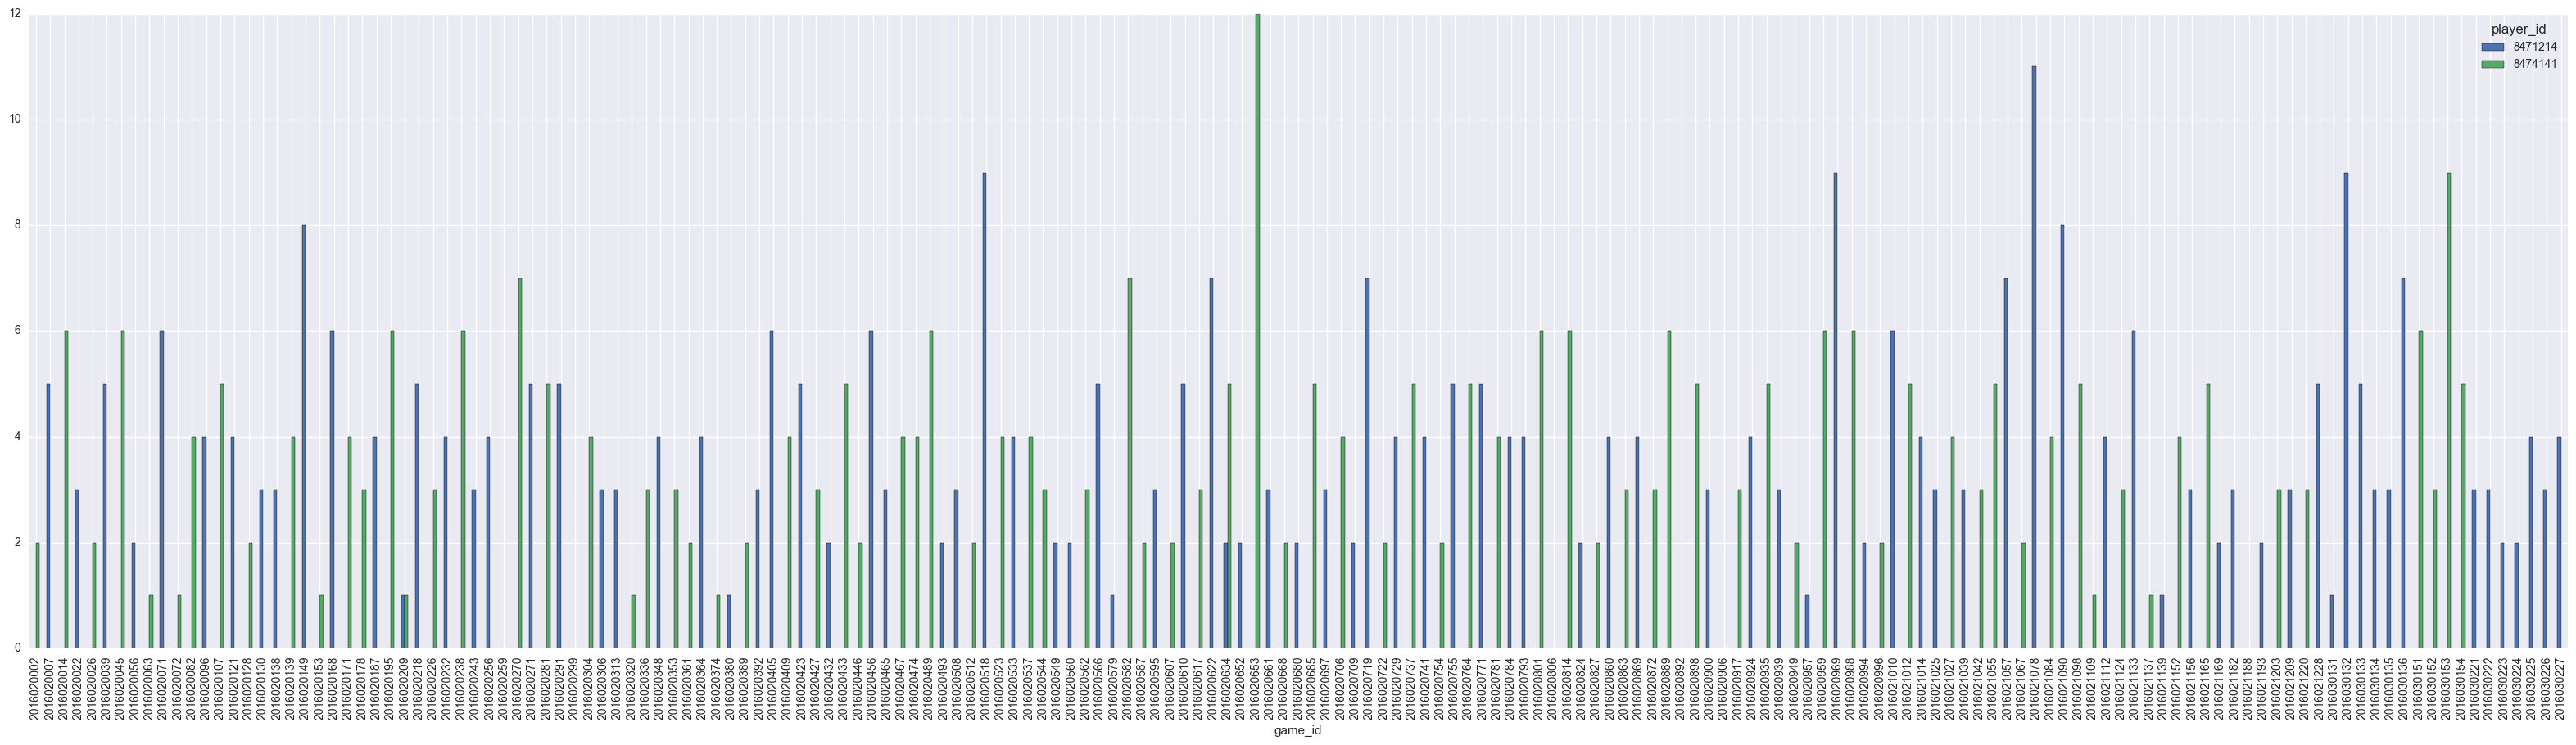

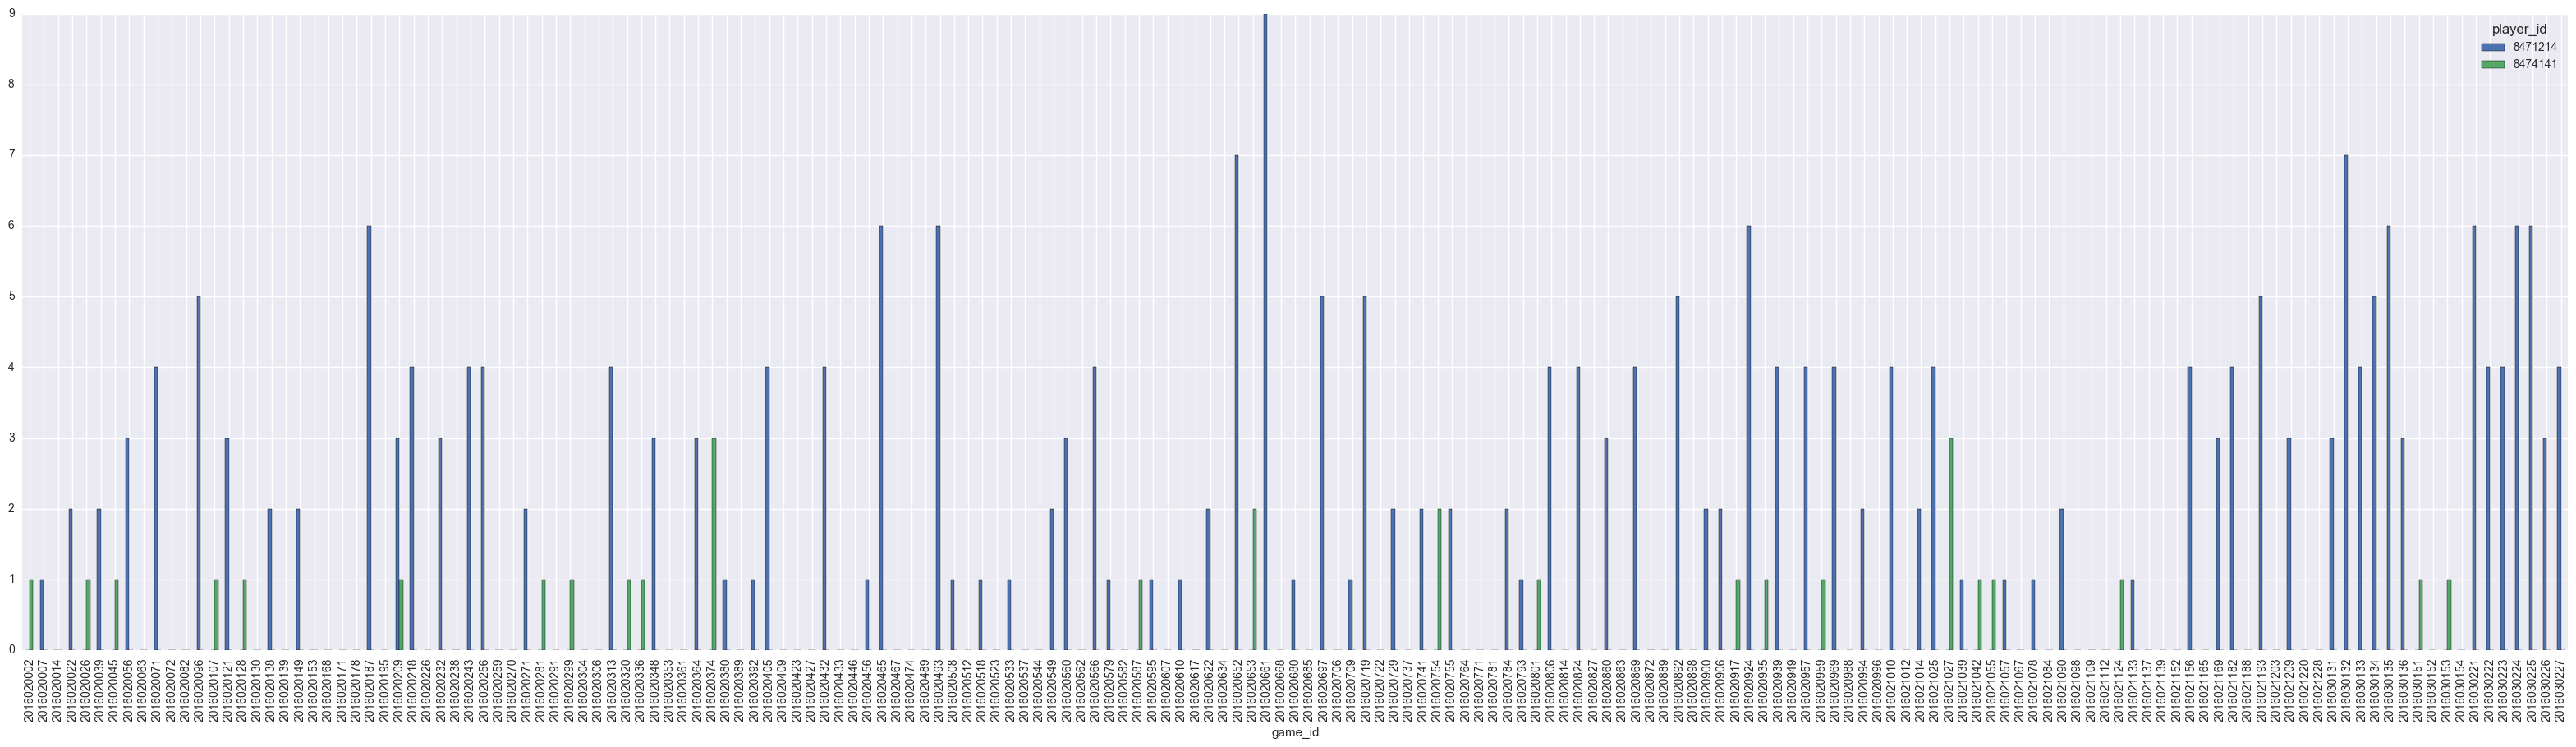

Please enter the list of teams Short Name separted by comma: Washington
Please enter the list of teams Team Name separted by comma: Capitals
Please enter the list of season for the teams separted by comma: 20172018
A.What was their Power Play Percentage, computed as 100% (Power Play Attempts / Power Play Goals)?
B.Compute the average per game of the following metric (takeaways - giveaways)
          game_id  team_id  shots  hits powerPlayPercentage  \
478    2017030311       15     32    15               50.0%   
480    2017030312       15     37    38              33.33%   
483    2017030313       15     38    33                0.0%   
485    2017030314       15     38    31                0.0%   
486    2017030315       15     30    35                0.0%   
489    2017030316       15     34    39              100.0%   
490    2017030317       15     23    27                0.0%   
493    2017030131       15     30    25              33.33%   
495    2017030132       15     58    33 

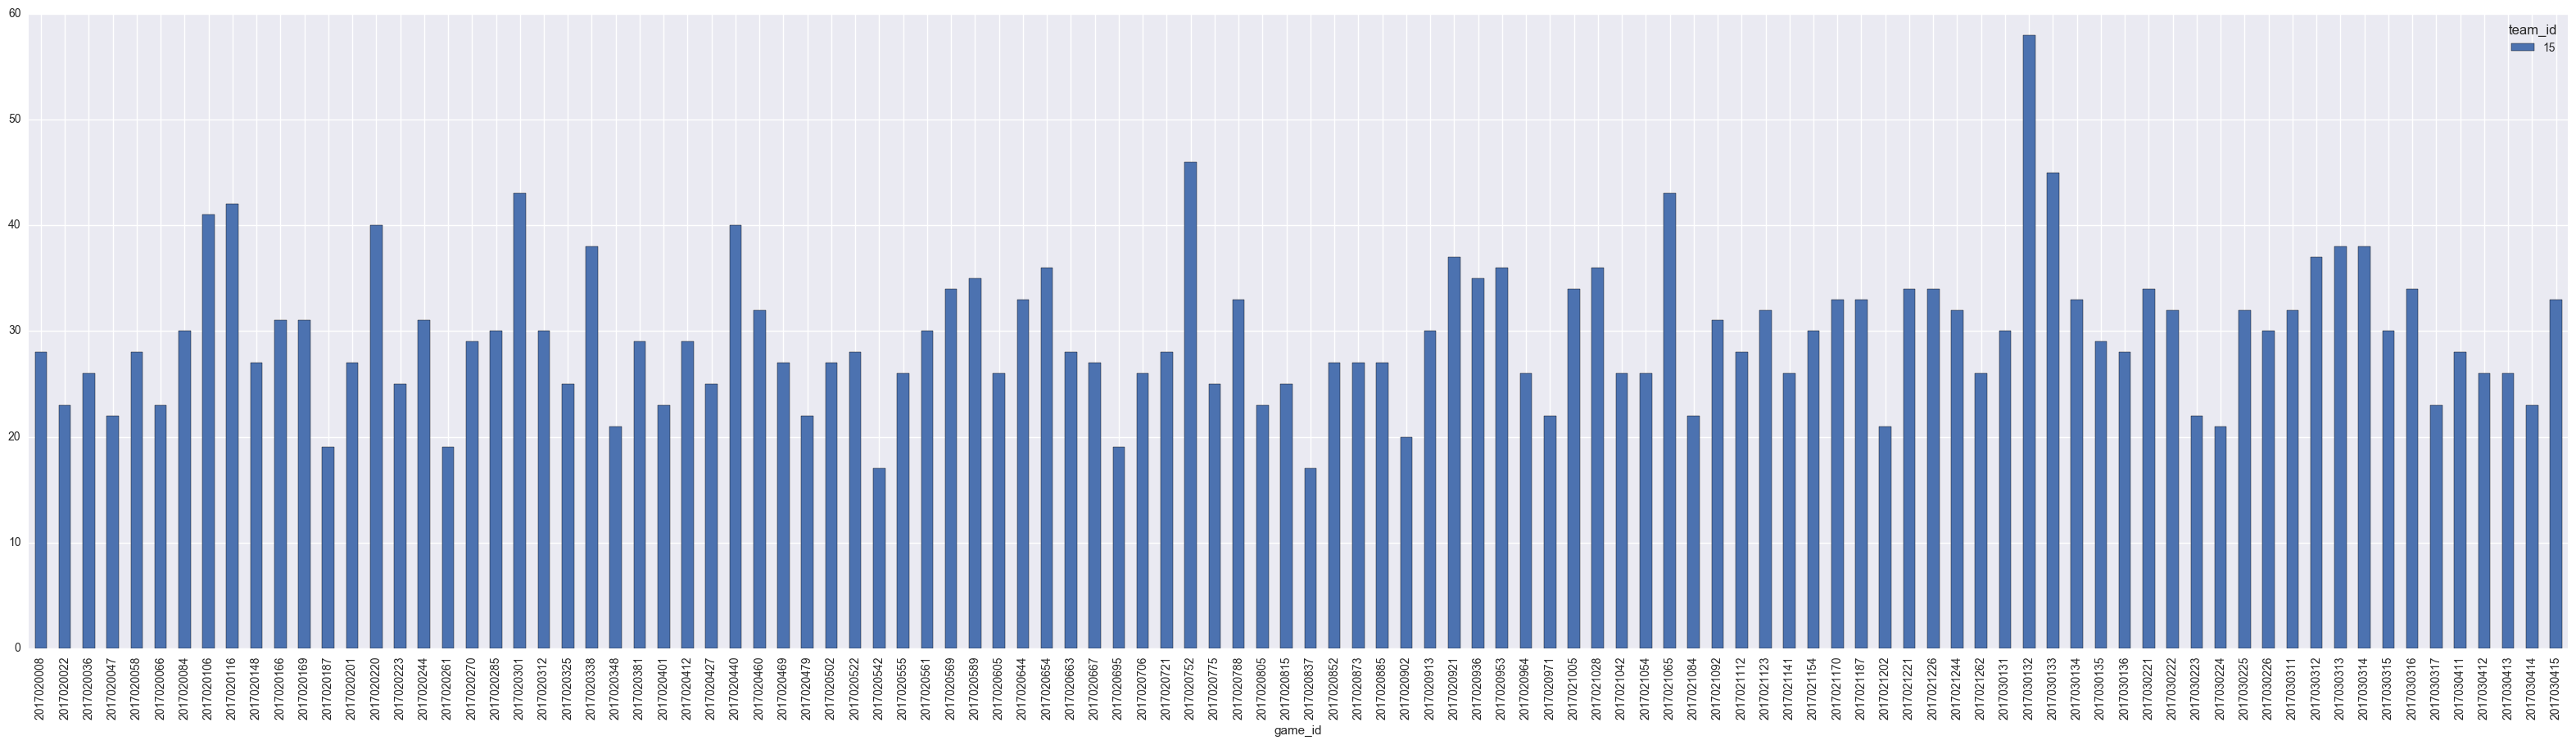

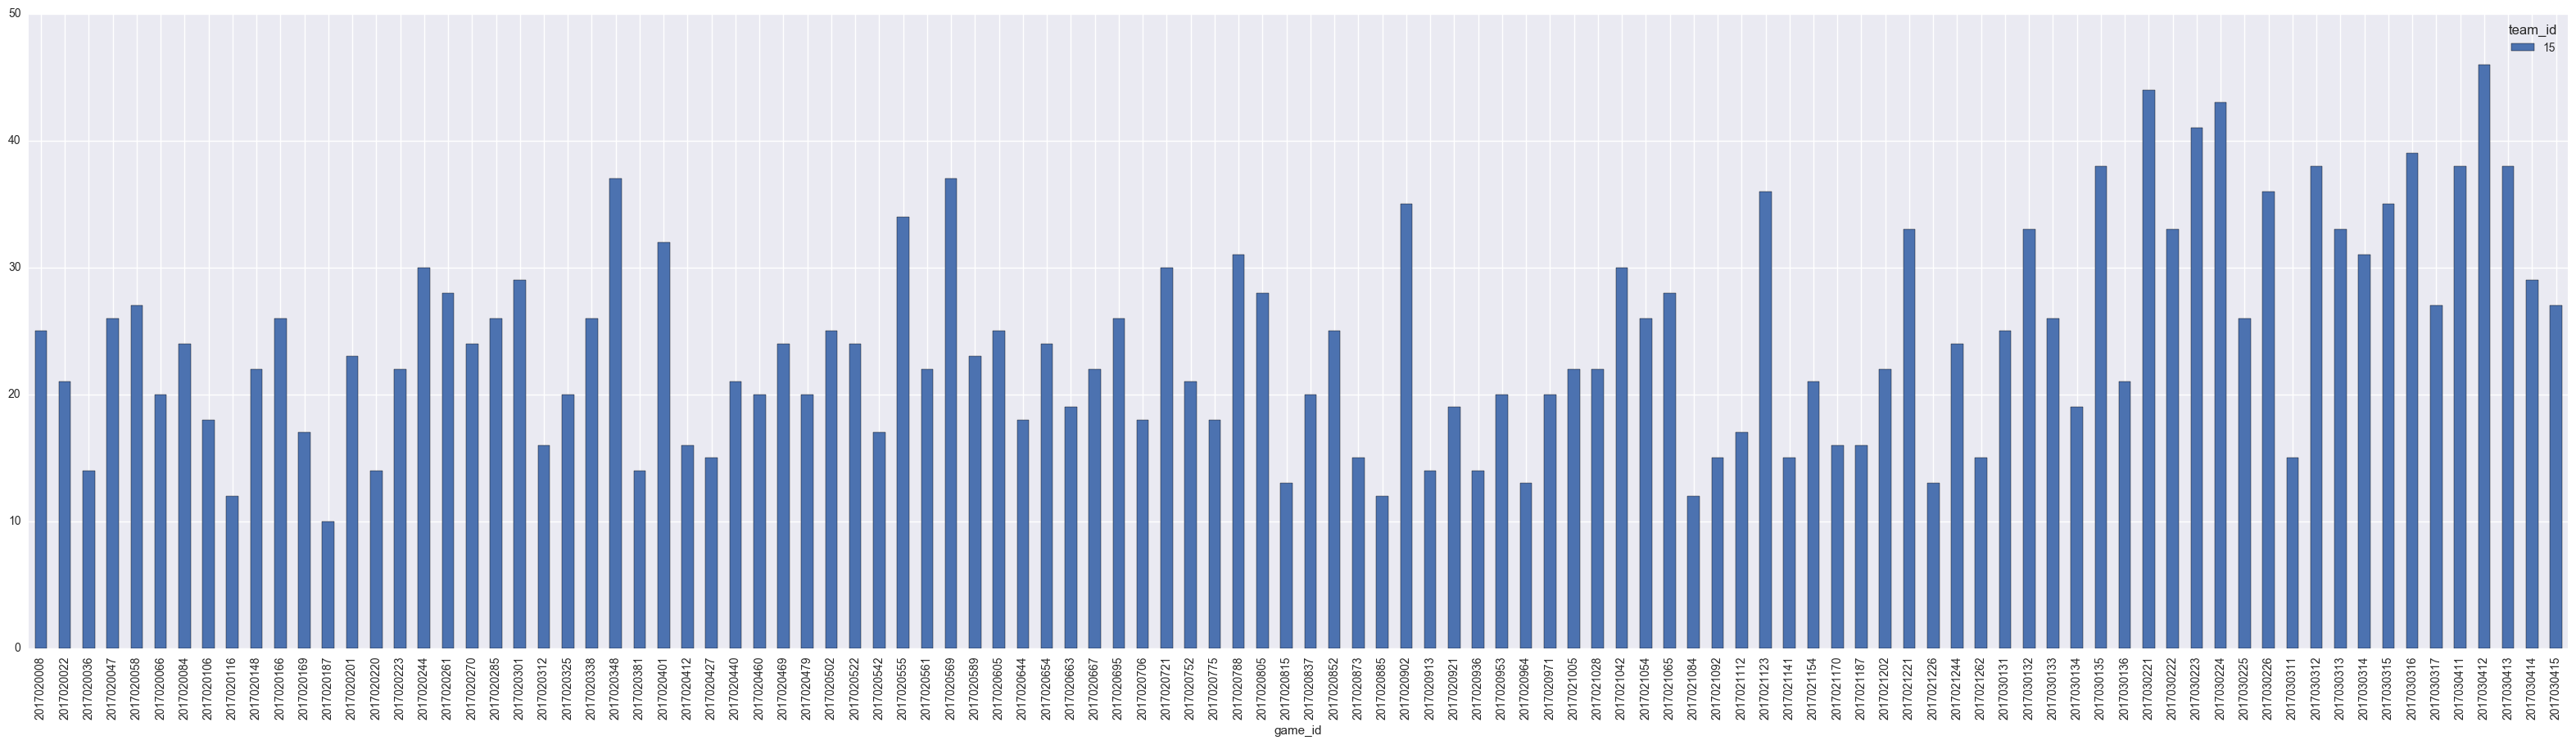

In [10]:
def main():
    
    playerAndGames = gettingThePlayerID()
    print("A.How many shift per game did they take?\nB.What was the average time per shift?")
    print(shiftsAnalysis(playerAndGames))
    print("C.How many shot attempts did they have per game?\nD.How many goals did they score per game?")
    shotsHitsForPlayers = shotsGoalsHitsPerPlayerPerGame(playerAndGames)
    print(shotsHitsForPlayers)
    shotsHitsForPlayers.pivot(index='game_id', columns='player_id', values='shots').plot(kind='bar',figsize=(40,10))
    shotsHitsForPlayers.pivot(index='game_id', columns='player_id', values='hits').plot(kind='bar',figsize=(40,10))
    plt.show()
    teamDetails = gettingTeamDetails()
    print("A.What was their Power Play Percentage, computed as 100% (Power Play Attempts / Power Play Goals)?\nB.Compute the average per game of the following metric (takeaways - giveaways)")
    teamStatisticsDetails = teamStatistics(teamDetails)
    print(teamStatisticsDetails)
    teamStatisticsDetails.pivot(index='game_id', columns='team_id', values='shots').plot(kind='bar',figsize=(40,10))
    plt.show()
    teamStatisticsDetails.pivot(index='game_id', columns='team_id', values='hits').plot(kind='bar',figsize=(40,10))
    plt.show()
    
if __name__ == '__main__':
    main()